In [35]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import myst_nb
from IPython.display import Image

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 8)
#pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## What to Look For in a Relationship?

When we investigate multiple variables, we examine the relationship between them, in addition to their univariate distributions. In this section, we consider pairs of features and describe what to look for. According to {numref}Table %s <plots-for-pairs-features>, the combination of quantitative and qualitative features guides us to make different sorts of plots. We consider these combinations in turn.

:::{table} Plots for Pairs of Feature Types :name: plots-for-pairs-features

| Feature Type | Dimension | Plot |
| --- | --- | --- |
| Quantitative | Two Features | Scatter plot, smooth curve, contour plot, heat map, quantile-quantile plot |
| Qualitative | Two Features | Side-by-side bar plots, mosaic plot, overlaid lines |
| Mixed | Two Features | Overlaid density curves, side-by-side box-and-whisker plots, overlaid smooth curves, quantile-quantile plot |

We'll work with the ```dogs``` dataframe once again.

In [4]:
dogs = pd.read_csv('data/akc.csv')
dogs

,breed,group,score,longevity,...,size,weight,height,repetition
0,Border Collie,herding,3.64,12.52,...,medium,NaN,51.0,<5
1,Border Terrier,terrier,3.61,14.00,...,small,6.0,NaN,15-25
2,Brittany,sporting,3.54,12.92,...,medium,16.0,48.0,5-15
...,...,...,...,...,...,...,...,...,...
169,Wire Fox Terrier,terrier,NaN,13.17,...,small,8.0,38.0,25-40
170,Wirehaired Pointing Griffon,sporting,NaN,8.80,...,medium,NaN,56.0,25-40
171,Xoloitzcuintli,non-sporting,NaN,NaN,...,medium,NaN,42.0,NaN


## Two Quantitative Features

If both features are quantitative, then we often examine their relationship with a **scatter plot**. Each point in a scatter plot marks the position of a pair of values for an observation. So, we can think of a scatter plot is like a two-dimensional rug plot.

With scatter plots, we look for linear and simple nonlinear relationships, where a transformation of one or the other or both features leads to a linear relationship, and we examine the strength of the relationship.

{numref}Figure %s <height-vs-weights> displays a scatter plot of weight and height of dog breeds (both are quantitative). We observe that dogs that are above average in height tend to be above average in weight. This relationship appears nonlinear: the change in weight for taller dogs grows faster than for shorter dogs. Indeed, that makes sense if we think of a dog as basically shaped like a box: for similarly proportioned boxes, the weight of the contents of the box has a cubic relationship to its length.

<AxesSubplot:title={'center':'Relationship between weight and height for dog breeds.'}, xlabel='height', ylabel='weight'>

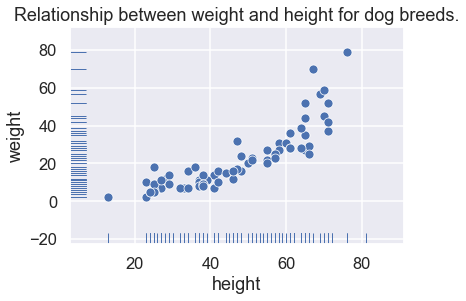

In [15]:
# Store plot
sns.scatterplot(data=dogs, x='height', y='weight').set(title='Relationship between weight and height for dog breeds.')
sns.rugplot(data=dogs,x='height',y='weight',height=0.05)

**Two Univariate Plots ≠ One Bivariate Plot.** The histograms for two quantitative features do not contain enough information to create their scatter plot so we must exercise caution when we read a pair of histograms. That is, the histograms do not show how these two quantities vary together. We need to use one of the plots listed in the appropriate row of Table 10.4 (scatter plot, smooth curve, contour plot, heat map, quantile-quantile plot) to get a sense of the relationship between two quantitative features.

## 10.3.2. One Qualitative and One Quantitative Variable

When we examine the relationship between a quantitative and a qualitative feature, we often use the qualitative feature to divide the data into groups and compare the distribution of the quantitative feature across these groups. For example, we can compare the distribution of breed height for small, medium and large dogs (Figure 10.8). We see that the distribution of height for the small and medium breeds both appear bimodal, and the left mode is the larger mode in each group. Also, the small and medium groups have a larger spread in height than the large group of breeds.

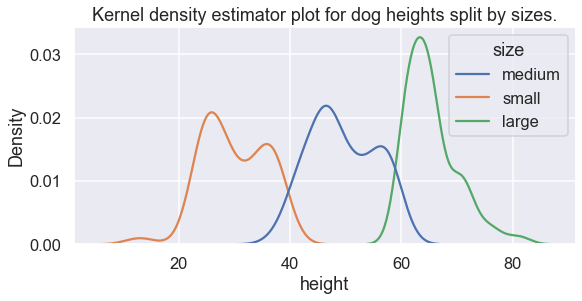

In [17]:
plt.figure(figsize=(9, 4))
sns.kdeplot(data=dogs, x='height', hue='size').set(title='Kernel density estimator plot for dog heights split by sizes.');

Side-by-side box plots offer a similar comparison of distributions across groups. Boxplots offer a simpler approach that can give a crude understanding of distributions. Figure 10.9 shows three boxplots for height, one for each size of dog. These plots make it clear that the size categorization is based on height because there is no overlap in height ranges for the groups. (This was not evident in the density curves due to the smoothing). What we don’t see in these box plots is the bimodality in the small and medium groups, but we can still see that the large dogs have a more narrow spread in height compared to the other two groups.

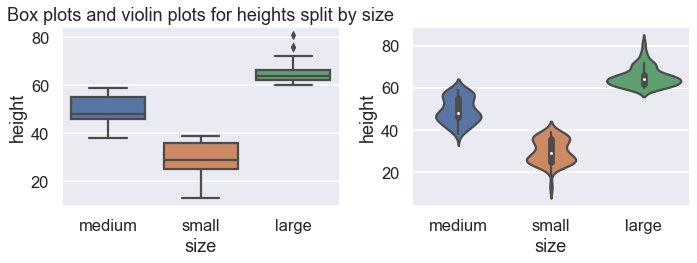

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(10, 4))
sns.boxplot(data=dogs, x='size', y='height', ax=ax1).set(title='Box plots and violin plots for heights split by size')


sns.violinplot(data=dogs, x='size', y='height', ax=ax2)

plt.tight_layout()

Also in Figure 10.9 is a violin plot of height for each size group. The violin plots sketch density curves along an axis for each dog. A flipped version of the density curve is added to create a symmetric “violin”. The violin plot aims to bridge the gap between overlaid density curves and side-by-side box plots.

Box-and-whisker plots (also known simply as box plots) give a visual summary of a few important statistics for a distribution. Typically, they display the median, 25th percentile, 75th percentile, the minimum, and the maximum. Box plots are constructed from a few summary statistics and so they cannot reveal as much structure in a distribution as a histogram or density curve. They primarily reveal symmetry and skew, long/short tails, and unusually large/small values.

Figure 10.10 is a visual explanation of the parts of a box plot; it is constructed from the 25th, 50th, and 75th percentiles. Asymmetry is evident from a median that is not in the middle of the box, tail lengths are shown by the whiskers, and outliers by the points that appear beyond the whiskers.



In [40]:
Image(url= "figures/box_plot.svg", width=600, height=500)

## 10.3.3. Two Qualitative Features

With two qualitative features, we often examine the distribution of one feature across subgroups defined by the second. In effect, we hold one feature constant and plot the distribution of the second. For example, we might consider the relationship between the suitability of a breed for children and the size of the breed. Figure 10.11 offers one view into this relationship. The three vertical bands represent the three child-friendly categories. The width of the band is proportional to the number of breeds in that category. Within each band we further subdivide it according to the size of the breed; these are the color blocks. We see that among the low-suitability breeds, roughly 3/4 of the dog breeds are small.

In [44]:
Image(url="figures/kids-vs-size-band-plot.png", width=700, height=700)

A treemap showing the proportions of dog sizes for each level of children suitability. ```

The heights of the color blocks represent the percentage of dogs of the corresponding size in the suitability category. There are three sets of proportions (one each for low, medium, and high suitability) the the proportions in each set sum to 1 or 100%. These are also displayed numerically in following cell.

In [45]:
kids = (dogs['children'].replace({ 1.0: 'high', 2.0: 'medium', 3.0: 'low' }))
def proportions(series):
    return series / sum(series)

counts = (dogs.assign(kids=kids)
 .groupby(['kids', 'size'])
 .size()
 .rename('count')
)

prop_table = (counts
 .unstack(level=1)
 .reindex(['high', 'medium', 'low'])
 .apply(proportions, axis=1)
)

prop_table

size,large,medium,small
kids,,,
high,0.373134,0.358209,0.268657
medium,0.285714,0.342857,0.371429
low,0.100000,0.200000,0.700000


We can also visualize these proportions using lineplots as shown in {numref}Figure %s <points-kids-props>. There is one line (set of connected dots) for each suitability level. The connected dots give the breakdown of size within suitability. We see that many small breeds have low suitability for kids.

In [46]:
# Store plot
props = prop_table.reset_index().melt(id_vars=['kids'], value_name='prop')
sns.pointplot(data=props,
              x='size', y='prop', hue='kids',
              order=['small', 'medium', 'large'],
              hue_order=['low', 'medium', 'high'])
plt.ylabel('proportion within size')

myst_nb.glue('points-kids-props', plt.gcf(), display=False)
plt.close();

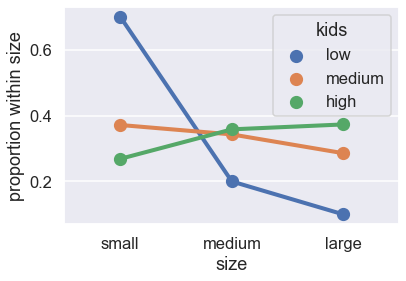

In [47]:
props = prop_table.reset_index().melt(id_vars=['kids'], value_name='prop')
sns.pointplot(data=props,
              x='size', y='prop', hue='kids',
              order=['small', 'medium', 'large'],
              hue_order=['low', 'medium', 'high'])
plt.ylabel('proportion within size');

This point plot splits the dogs by sizes and shows the proportion of dogs with each children suitability within each size. ```

We can also present these proportions as a collection of side-by-side bar plots:

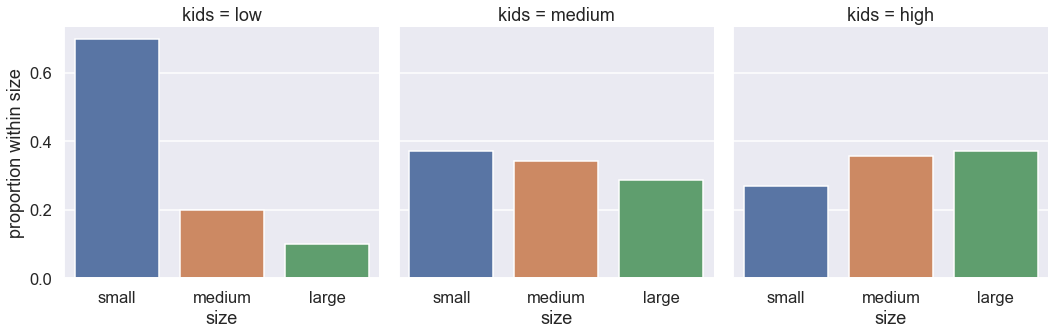

In [48]:
g = sns.catplot(data=props,
                x='size', y='prop',
                order=['small', 'medium', 'large'],
                col='kids',
                col_order=['low', 'medium', 'high'],
                kind='bar')

g.set_ylabels('proportion within size');

We've covered exploratory visualizations that incorporate one or two features. In the next section, we'll discuss visualizations that incorporate more than two features at once.